In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

2025-07-22 13:14:19.772879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753190060.176688      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753190060.289296      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path = "/kaggle/input/digit-recognizer/train.csv"
test_path = "/kaggle/input/digit-recognizer/test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
labels = train_df['label'].values
pixel_cols = [f'pixel{i}' for i in range(784)]
pixels = train_df[pixel_cols].values

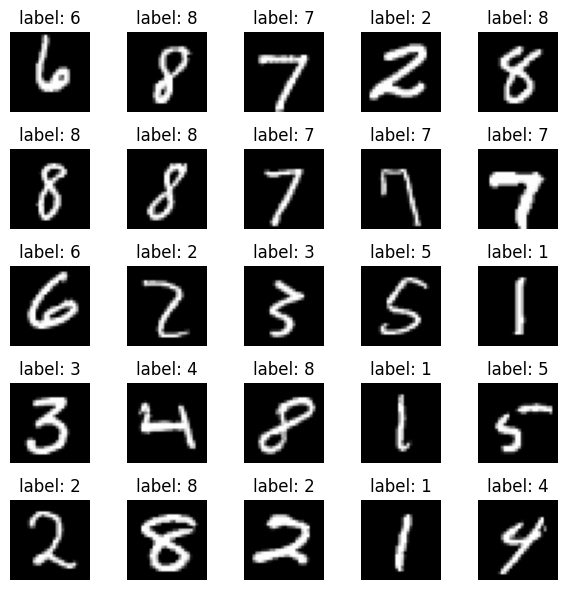

In [3]:
def row2img(row):
    return row.reshape((28, 28))

# example images
n_rows, n_cols = 5, 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6,6))
for ax in axes.flatten():
    idx = np.random.randint(len(pixels))
    img = row2img(pixels[idx])
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f'label: {labels[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
labels = train_df['label'].values
pixels = train_df.drop(columns=['label']).values
print(labels.shape)
print(pixels.shape)

X_train, X_val, y_train, y_val = train_test_split(
    pixels, labels, test_size=0.2, stratify=labels, random_state=42)

(42000,)
(42000, 784)


In [5]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0
print(X_train.shape)
print(X_val.shape)
print(X_train.ndim)

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
print(y_train.shape)
print(y_train.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
4
(33600, 10)
(33600, 10)


In [6]:
augment = Sequential([
    layers.RandomRotation((-0.1, 0.1)),
    layers.RandomColorJitter((0, 1))
])

2025-07-22 13:14:45.594019: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
model = Sequential([
    augment,
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=64
)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6965 - loss: 0.9001 - val_accuracy: 0.9495 - val_loss: 0.1490
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9442 - loss: 0.1750 - val_accuracy: 0.9718 - val_loss: 0.0906
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9610 - loss: 0.1271 - val_accuracy: 0.9764 - val_loss: 0.0769
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9685 - loss: 0.1047 - val_accuracy: 0.9750 - val_loss: 0.0731
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9701 - loss: 0.0933 - val_accuracy: 0.9812 - val_loss: 0.0625
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9769 - loss: 0.0746 - val_accuracy: 0.9814 - val_loss: 0.0589
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9783 - loss: 0.0705 - val_accuracy: 0.9831 - val_loss: 0.0562
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.9801 - loss: 0.0627 - 

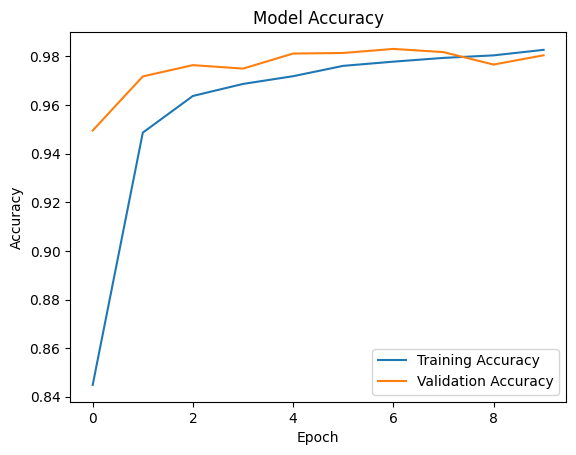

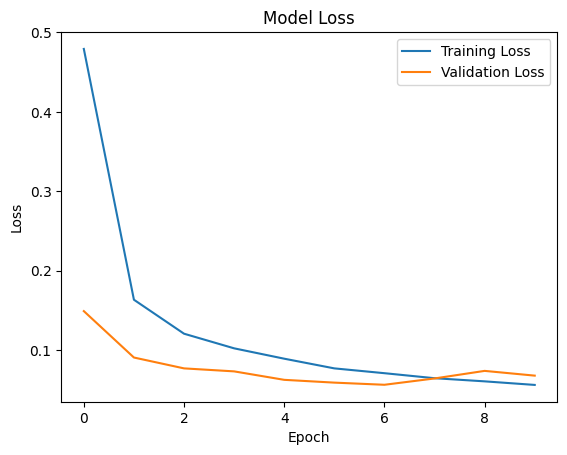

In [9]:
# acc
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")

Validation loss: 0.0677
Validation accuracy: 0.9805


In [11]:
test_pixel_cols = [f'pixel{i}' for i in range(784)]
test_pixels = test_df[pixel_cols].values
X_test = test_pixels.reshape(-1, 28, 28, 1).astype('float32') / 255.0

pred_probs = model.predict(X_test, verbose=0)
print(pred_probs)
pred_labels = pred_probs.argmax(axis=1)
print(pred_labels)

[[2.7934743e-07 6.1546235e-10 9.9997073e-01 ... 1.2445506e-05
  1.5164136e-05 7.1184152e-09]
 [9.9993855e-01 1.4193406e-08 1.1293073e-06 ... 3.4294004e-07
  3.8952811e-07 1.1569157e-05]
 [9.0838370e-08 1.2062521e-09 4.4412877e-06 ... 1.1928898e-06
  6.8496123e-02 9.3130255e-01]
 ...
 [8.5749956e-13 5.5428207e-11 3.3830582e-12 ... 3.2472507e-11
  1.8807876e-08 4.2202934e-12]
 [1.7015486e-08 4.4325867e-09 1.4546657e-07 ... 6.2900770e-05
  3.3882395e-07 9.9974918e-01]
 [5.6340893e-10 7.7344756e-11 9.9986720e-01 ... 1.5626842e-06
  1.3053729e-04 2.6833441e-10]]
[2 0 9 ... 3 9 2]


In [12]:
submission = pd.DataFrame({
    'ImageId': range(1, len(pred_labels) + 1),
    'label': pred_labels
})

print(submission.head())
print(submission.shape)
submission.to_csv('/kaggle/working/submission.csv', index=False)

   ImageId  label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
(28000, 2)
